# Historical-Future scenarios

In [ ]:
%cd ..

In [247]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import pyam
from mce.core import ScenarioBase
from mce.util.plot_base import PlotBase

In [244]:
pyam_colors = pyam.plotting.PYAM_COLORS

In [72]:
myplt = PlotBase(palette='ipcc_wg1')

## Input data

In [153]:
ds_hist = ScenarioBase(outpath='datain/ds_historical.h5', mode='r')
ds_rcmip2 = ScenarioBase(outpath='datain/ds_rcmip2.h5', mode='r')
ds_ar6db_imp = ScenarioBase(outpath='datain/ds_ar6db_imp.h5', mode='r')

[2025-04-19 18:37:09 mce.core] INFO:datain/ds_historical.h5 already exists
[2025-04-19 18:37:09 mce.core] INFO:file datain/ds_historical.h5 opened with mode=r
[2025-04-19 18:37:09 mce.core] INFO:datain/ds_rcmip2.h5 already exists
[2025-04-19 18:37:09 mce.core] INFO:file datain/ds_rcmip2.h5 opened with mode=r
[2025-04-19 18:37:09 mce.core] INFO:datain/ds_ar6db_imp.h5 already exists
[2025-04-19 18:37:09 mce.core] INFO:file datain/ds_ar6db_imp.h5 opened with mode=r


In [154]:
list(ds_hist.file)

['historical', 'source']

In [155]:
list(ds_rcmip2.file)

['1pctCO2',
 '1pctCO2-4xext',
 'abrupt-0p5xCO2',
 'abrupt-2xCO2',
 'abrupt-4xCO2',
 'esm-bell-1000PgC',
 'esm-bell-2000PgC',
 'esm-bell-750PgC',
 'esm-pi-CO2pulse',
 'esm-pi-cdr-pulse',
 'esm-piControl',
 'historical',
 'historical-cmip5',
 'piControl',
 'rcp26',
 'rcp45',
 'rcp60',
 'rcp85',
 'ssp119',
 'ssp126',
 'ssp245',
 'ssp370',
 'ssp370-lowNTCF-aerchemmip',
 'ssp370-lowNTCF-gidden',
 'ssp434',
 'ssp460',
 'ssp534-over',
 'ssp585']

In [157]:
list(ds_ar6db_imp.file)

['CurPol',
 'GS',
 'LD',
 'ModAct',
 'Neg',
 'Neg-2.0',
 'Ren',
 'Ren-2.0',
 'SP',
 'source']

Five illustrative mitigation pathways
- IMP-SP: mitigation in the context of broader sustainable development;
- IMP-LD: strong emphasis on energy demand reductions;
- IMP-Ren: heavy reliance on renewables;
- IMP-Neg: extensive use of carbon dioxide removal (CDR) in the energy and the industry sectors to achieve net negative emissions;
- IMP-GS: the implications of a less rapid and gradual strengthening of near-term mitigation actions

Ren and Neg have 2-degC sensitivity case

Two reference pathways as the consequences of current policies and pledges
- ModAct: Moderate action, explores the impact of implementing the Nationally Determined Contributions (NDCs) as formulated in 2020 and some further strengthening after that;
- CurPol: explores the consequences of continuing along the path of implemented climate policies in 2020 and only a gradual strengthening after that

## Plot selected variables

In [233]:
def retrieve_data(ds, scenario):
    """Retrieve scenario data
    """
    data = {
        cat: pd.DataFrame({
            (k, v.attrs['units']): v for k, v in g.items()
        }).set_index(('time', 'yr'))
        for cat, g in ds.file[f'{scenario}/input'].items()
    }
    return data

In [252]:
cat = 'emis_slcf'
vu = ('SO2', 'Mt SO2 yr-1')

scen = 'ssp245'
retrieve_data(ds_rcmip2, scen)['emis']

,BC,C2F6,C3F8,C7F16,C8F18,CCl4,CF4,CFC-11,CFC-113,CFC-114,...,NOx,OC,SF6,SO2F2,Sulfur,VOC,c-C4F8,n-C4F10,n-C5F12,n-C6F14
,Mt BC yr-1,kt C2F6 yr-1,kt C3F8 yr-1,kt C7F16 yr-1,kt C8F18 yr-1,kt CCl4 yr-1,kt CF4 yr-1,kt CFC-11 yr-1,kt CFC-113 yr-1,kt CFC-114 yr-1,...,Mt NOx yr-1,Mt OC yr-1,kt SF6 yr-1,kt SO2F2 yr-1,Mt SO2 yr-1,Mt VOC yr-1,kt c-C4F8 yr-1,kt n-C4F10 yr-1,kt n-C5F12 yr-1,kt n-C6F14 yr-1
"(time, yr)",,,,,,,,,,,,,,,,,,,,,
1750,2.097771,0.0,0.0,0.0,0.0,0.024857,0.010071,0.0,0.0,0.0,...,12.735212,15.447668,0.0,0.0,2.440048,60.021826,0.0,0.0,0.0,0.0
1751,2.072926,0.0,0.0,0.0,0.0,0.024857,0.010071,0.0,0.0,0.0,...,12.592303,15.188717,0.0,0.0,2.408379,59.088126,0.0,0.0,0.0,0.0
1752,2.064312,0.0,0.0,0.0,0.0,0.024857,0.010071,0.0,0.0,0.0,...,12.594270,15.034476,0.0,0.0,2.397116,58.631997,0.0,0.0,0.0,0.0
1753,2.071951,0.0,0.0,0.0,0.0,0.024857,0.010071,0.0,0.0,0.0,...,12.539820,15.182545,0.0,0.0,2.410693,59.026349,0.0,0.0,0.0,0.0
1754,2.099350,0.0,0.0,0.0,0.0,0.024857,0.010071,0.0,0.0,0.0,...,12.636837,15.558773,0.0,0.0,2.462065,60.269945,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,1.210632,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,15.837425,10.702379,0.0,0.0,2.030862,40.272056,0.0,0.0,0.0,0.0
2470,1.210632,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,15.837425,10.702379,0.0,0.0,2.030862,40.272056,0.0,0.0,0.0,0.0


In [248]:
pyam_colors

{'AR6-SSP1': '#1e9583',
 'AR6-SSP2': '#4576be',
 'AR6-SSP3': '#f11111',
 'AR6-SSP4': '#e78731',
 'AR6-SSP5': '#8036a7',
 'AR6-SSP1-1.9': '#00a9cf',
 'AR6-SSP1-2.6': '#003466',
 'AR6-SSP2-4.5': '#f69320',
 'AR6-SSP3-7.0': '#df0000',
 'AR6-SSP3-LowNTCF': '#e61d25',
 'AR6-SSP4-3.4': '#2274ae',
 'AR6-SSP4-6.0': '#b0724e',
 'AR6-SSP5-3.4-OS': '#92397a',
 'AR6-SSP5-8.5': '#980002',
 'AR6-RCP-2.6': '#003466',
 'AR6-RCP-4.5': '#709fcc',
 'AR6-RCP-6.0': '#c37900',
 'AR6-RCP-8.5': '#980002',
 'AR5-RCP-2.6': '#0000FF',
 'AR5-RCP-4.5': '#79BCFF',
 'AR5-RCP-6.0': '#FF822D',
 'AR5-RCP-8.5': '#FF0000',
 'AR6-C1': '#97CEE4',
 'AR6-C2': '#778663',
 'AR6-C3': '#6F7899',
 'AR6-C4': '#A7C682',
 'AR6-C5': '#8CA7D0',
 'AR6-C6': '#FAC182',
 'AR6-C7': '#F18872',
 'AR6-C8': '#BD7161',
 'AR6-IMP-LD': '#4FA7BF',
 'AR6-IMP-Ren': '#2B7C8B',
 'AR6-IMP-SP': '#004D52',
 'AR6-IMP-Neg': '#84A12B',
 'AR6-IMP-GS': '#6E7895',
 'AR6-IP-ModAct': '#F29424',
 'AR6-IP-CurPol': '#E31F2B'}

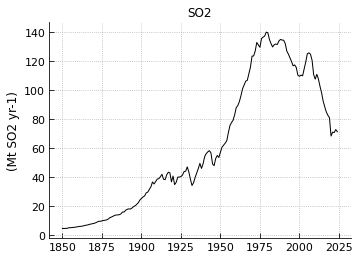

In [238]:
cat = 'emis_slcf'
vu = ('SO2', 'Mt SO2 yr-1')

myplt.init_regular()
ax = myplt(0)

data = retrieve_data(ds_hist, 'historical')
d1 = data[cat].loc[1850:, vu]
ax.plot(d1.index, d1, label='historical')

ax.set_title(vu[0])
ax.set_ylabel('({})'.format(vu[1]))
ax.grid()

## An example of an AR6 IMP scenario merged with historical

In [158]:
data_hist = {
    cat: pd.DataFrame({
        (k, v.attrs['units']): v for k, v in g.items()
    }).set_index(('time', 'yr'))
    for cat, g in ds_hist.file['historical/input'].items()
}

In [163]:
scen = 'SP'
data_future = {
    cat: pd.DataFrame({
        (k, v.attrs['units']): v for k, v in g.items()
    }).set_index(('time', 'yr'))
    for cat, g in ds_ar6db_imp.file[f'{scen}/input'].items()
}

In [209]:
def merge(df_hist, df_future, t_start, t_end):
    """Merge historical and future scenarios

    Parameters
    ----------
    df_hist
        Historical scenario
    df_future
        Future scenario
    t_start
        Year of transition start
    t_end
        Year of transition end

    Returns
    -------
        Merged future scenario
    """
    df = pd.concat({'hist': df_hist, 'future': df_future}, axis=1)

    if np.any(np.isnan(df['hist'].loc[t_start:t_end-1])):
        raise ValueError('hist not all defined in {}-{}'.format(t_start, t_end-1))
    
    if np.any(np.isnan(df['future'].loc[t_start+1:t_end])):
        raise ValueError('future not all defined in {}-{}'.format(t_start+1, t_end))
    
    wgt_future = np.linspace(0., 1., t_end - t_start + 1)
    wgt_hist = 1. - wgt_future
    
    df = (
        df['hist'].loc[t_start:t_end].fillna(0.) * wgt_hist[:, None]
        + df['future'].loc[t_start:t_end].fillna(0.) * wgt_future[:, None]
    ).dropna(axis=1) # keep variables both in hist and future

    return pd.concat([df, df_future.loc[t_end+1:, df.columns]])

In [213]:
cat = 'emis_slcf'
t_start = 2020
t_end = 2025
df = merge(data_hist[cat], data_future[cat], t_start, t_end)

In [215]:
df

,BC,CO,NH3,NMVOC,NOx,OC,SO2
,Mt BC yr-1,Mt CO yr-1,Mt NH3 yr-1,Mt NMVOC yr-1,Mt NO2 yr-1,Mt OC yr-1,Mt SO2 yr-1
"(time, yr)",,,,,,,
2020,6.949436,727.018794,66.219291,185.329595,122.308705,29.221131,68.227768
2021,7.523362,797.036173,67.491932,201.265730,128.161473,33.383063,73.977065
2022,7.471011,726.189091,65.084585,187.368153,128.215948,27.541247,74.759479
2023,8.027435,834.144094,64.914022,208.052628,129.729101,34.359427,74.372716
2024,7.946923,783.905653,60.917034,195.303082,126.558575,30.672823,70.298710
...,...,...,...,...,...,...,...
2096,2.616820,467.191893,25.513251,89.885386,34.043020,21.147114,10.457420
2097,2.611240,466.546532,25.492264,89.352653,33.882540,21.103854,10.374840


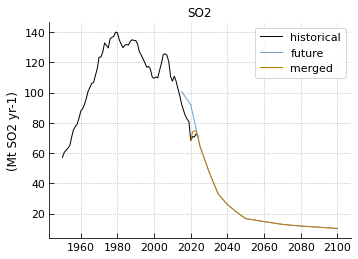

In [214]:
myplt.init_regular()
ax = myplt(0)

vu = ('SO2', 'Mt SO2 yr-1')
d1 = data_hist[cat][vu].loc[1950:]
ax.plot(d1.index, d1, label='historical')
d1 = data_future[cat][vu]
ax.plot(d1.index, d1, label='future')
d1 = df[vu]
ax.plot(d1.index, d1, label='merged')

ax.legend()
ax.set_title(vu[0])
ax.set_ylabel('({})'.format(vu[1]))
ax.grid()